In [2]:
import numpy as np
from numpy.linalg import inv
from LinearRegression import *
import matplotlib.pyplot as plt

In [3]:
X_train = np.array([2.5, 4.7, 5.2, 7.3, 9.5, 11.5]).reshape((6,1))
Y_train = np.array([5.21, 7.70, 8.30, 11, 14.5, 15])
X_test = np.array([3.5,5,6,8,10])

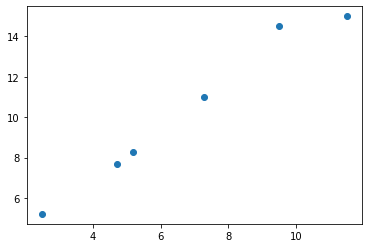

In [4]:
plt.scatter(X_train,Y_train)
plt.show()


## No regularisation

theta = fitGD(X_train,Y_train,0.001,0.1,0,10)
theta

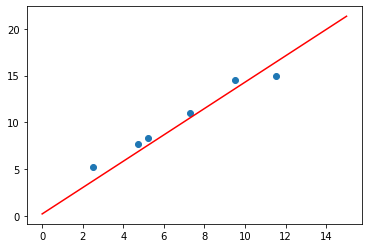

In [6]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta[1,0]*t + theta[0,0]
plt.plot(t, y, '-r')
plt.show()

In [8]:
yTest = theta[1,0]*X_test+ theta[0,0]
yTest

array([ 5.13325135,  7.24937599,  8.66012575, 11.48162526, 14.30312478])

## L1 Regularisation

array([[0.1955702 ],
       [1.41036659]])

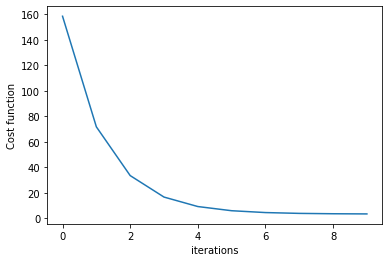

In [9]:
theta1 = fitGD(X_train,Y_train,0.001,0.1,1,10)
theta1

array([[0.1955702 ],
       [1.41036659]])

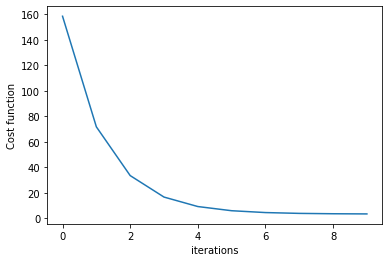

In [10]:
theta1 = fitGD(X_train,Y_train,0.001,0.1,1,10)
theta1

In [11]:
yTest1 = theta1[1,0]*X_test+ theta1[0,0]
yTest1

array([ 5.13185326,  7.24740314,  8.65776972, 11.4785029 , 14.29923607])

## L2 Regularisation

C:\Users\Dell\LinearRegression.py:57: RuntimeWarning: invalid value encountered in true_divide
  mod = theta/abs(theta)


array([[0.19481344],
       [1.41052431]])

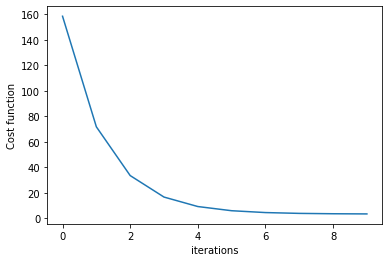

In [12]:
theta2 = fitGD(X_train,Y_train,0.001,0.1,2,10)
theta2

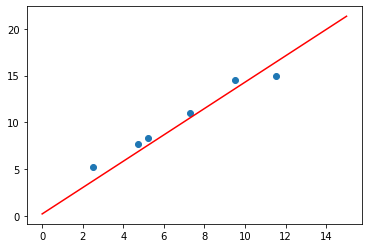

In [13]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta2[1,0]*t + theta2[0,0]
plt.plot(t, y, '-r')
plt.show()

In [14]:
yTest2 = theta2[1,0]*X_test+ theta2[0,0]
yTest2

array([ 5.13164852,  7.24743498,  8.65795929, 11.4790079 , 14.30005652])

## Normal Equation

In [15]:
theta3 = fitNormal(X_train,Y_train)
theta3

array([[2.36424288],
       [1.16767918]])

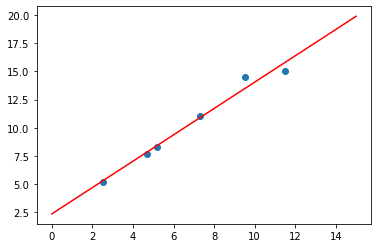

In [16]:
t = np.linspace(0,15,100)
plt.scatter(X_train,Y_train)
y = theta3[1,0]*t + theta3[0,0]
plt.plot(t, y, '-r')
plt.show()

In [17]:
yTest3 = theta3[1,0]*X_test+ theta3[0,0]
yTest3

array([ 6.45112002,  8.20263879,  9.37031797, 11.70567634, 14.0410347 ])

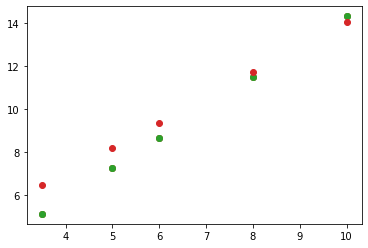

In [18]:
plt.scatter(X_test,yTest)
plt.scatter(X_test,yTest1)
plt.scatter(X_test,yTest2)
plt.scatter(X_test,yTest3)
plt.show()

## Locally weighted linear regression

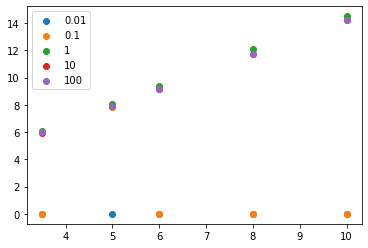

In [19]:
taus = [0.01,0.1,1,10,100]
x = X_test.reshape(5,1)
for tau in taus:
    yTest4 = locallyWeighed(X_train,Y_train,x,0.001,tau,1000)
    plt.scatter(X_test,yTest4, label = tau)
plt.legend()
plt.show()